## Project 1 : Analyzing Graduate School Admission Data
### Who gets into graduate school?

This project uses the [admissions.csv](https://github.com/alexperrier/gads/blob/master/project_01/admissions.csv) dataset to analyze the factors most predictive of graduate school admissions.

### Organization
1. Descriptive Statistics
1. Logistic Regression
1. Graphs

#### 1. *Descriptive Statistics*

In [197]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [42]:
#Read in data
df = pd.read_csv('admissions.csv')

#Get a sense of what the data looks like
df.shape
df.columns
df.head()


,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [63]:
#Summary statistics
df.describe()


C:\Users\Monica Farid\Anaconda2\envs\gads2\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


Value Counts Admit
0    273
1    127
Name: admit, dtype: int64
Value Counts Prestige
2.0    150
3.0    121
4.0     67
1.0     61
Name: prestige, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD4FC4D0F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CD4FDF96D8>]], dtype=object)

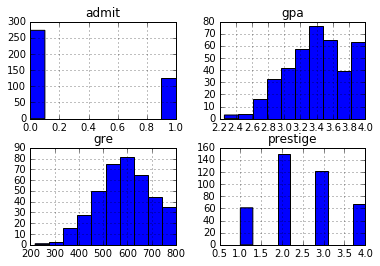

In [91]:
#Value counts for discrete variables
print('Value Counts Admit')
print(df.admit.value_counts())

print('Value Counts Prestige')
print(df.prestige.value_counts())

#Plot histogram of all variables
df.hist()

In [220]:
#Get a sense of how many observations are missing
all_vars = ['admit', 'gre', 'gpa', 'prestige']
for i in range(0,len(all_vars)):
    print("Num Missing", all_vars[i])
    print(df[df[all_vars[i]].isnull()].shape)

del(all_vars)

Num Missing admit
(0, 5)
Num Missing gre
(0, 5)
Num Missing gpa
(0, 5)
Num Missing prestige
(0, 5)


In [219]:
#Examine how predictors (gpa and gre and prestige) are different for admits and non-admits
from scipy import stats

pred_vars = ['gre', 'gpa', 'prestige'] 
cond=(df.admit==1)
for i in range(0,len(variables)):
    print("Mean", pred_vars[i],"for Admits")
    print(df[cond][pred_vars[i]].mean())
    
    print("Mean", pred_vars[i],"for Non-Admits")
    print(df[~cond][pred_vars[i]].mean())

del(pred_vars)

#THINGS I WAS TRYING BUT DIDN'T MANAGE TO MAKE WORK

#find correlation between vars
#np.corrcoef('gre', 'gpa')
#stats.pearsonr('admit', 'gre')
#Can we reject the null that the means between the two groups are the same?
#ttest_ind(df[cond]['gpa'], df[~cond]['gpa'], equal_var= False)

Mean gre for Admits
618.571428571
Mean gre for Non-Admits
573.579335793
Mean gpa for Admits
3.48920634921
Mean gpa for Non-Admits
3.34715867159
Mean prestige for Admits
2.15079365079
Mean prestige for Non-Admits
2.64575645756


Mean gre for Prestige =  1
611.803278689
Mean gpa for Prestige =  1
3.4531147541
Mean gre for Prestige =  2
596.621621622
Mean gpa for Prestige =  2
3.36736486486
Mean gre for Prestige =  3
574.876033058
Mean gpa for Prestige =  3
3.43289256198
Mean gre for Prestige =  4
570.149253731
Mean gpa for Prestige =  4
3.31835820896
Crosstab of Admit and Rank of Undergraduate institution
prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


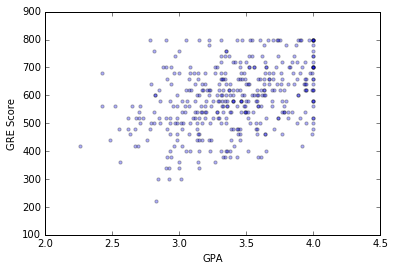

In [222]:
#Examine how each var covaries with prestige

covars= ['gre', 'gpa'] 
for i in range(1,5):
    cond=(df.prestige==i)
    for c in range(0, len(covars)):
        print("Mean", covars[c],"for Prestige = ", i)
        print(df[cond][covars[c]].mean())


#Can do crosstab counts for the discrete variables
print("Crosstab of Admit and Rank of Undergraduate institution")
print(pd.crosstab(df['admit'], df['prestige'], rownames=['admit']))

del(covars)

#How stronly are GPA and GRE correlated? 
#stats.pearsonr('gpa', 'gre') - doesnt work yet

#Scatter plot of GPA and GRE
print('Scatter Plot of GPA and GRE')
plt.scatter(df.gpa, df.gre, s=10, alpha=0.3)
plt.xlabel('GPA')
plt.ylabel('GRE Score')

### What we know so far
* Outcome variable is binary variable 'admit' which is 1 if person is admitted and 0 otherwise.
* Predictor variables are gre, prestige, and gpa which indicate the applicant's GRE score, their undergraduate institutions rank and their undergraduate GPA respectively
* Two of the variables are discrete : admit and prestige and the rest (gpa and gre) can be considered continuous.
* From the descriptive stats we see:
  * A low number of missings
  * Distributions of gpa and gre are somewhat left-skewed
  * Mean of predictor variable is higher for admits
  * In general, mean of GPA and GRE increases with increasing rank of the school but it's not monotonic nor linear

#### 1. *Logistic Regression*

## Research Question: 
1. Which factor is most predictive of college admission? Are there differential impacts of GPA or GRE by rank of your undergraduate institution?
2. How well does your college rank and GPA predict your GRE score?

In [233]:
#create dummy variables for rank
dummies = pd.get_dummies(df['prestige'], prefix = 'pres')
print(dummies.head())
dummy=list(dummies)
print(dummy[1])

#create interaction terms. Couldnt figure this out
"""inter=[]
for i in range(1,5):
    #inter[i]=df[dummy[i]]*df['gpa']"""


#omit pres1 - will be left-out category
cols = ['admit', 'gre', 'gpa']
newdata = df[cols].join(dummies.ix[:, 'pres_2':])
print(newdata.head())

#drop any observation with null values
df=df.dropna()
print(df.shape)

#run logistic regression with no interactions
covar_cols = newdata.columns[1:]
logit =sm.Logit(newdata['admit'], newdata[covar_cols])
result = logit.fit()
print(result.summary())

#Convert to odds ratios
print(np.exp(result.params))

#del(newdata)
#dichotomize gpa and gre to make OR results more interpretable-still not working
"""gpa_dummy=0
if df.gpa > 3:
    gpa_dummy=1"""

#run logistic with Gpa*prestige interaction terms

#run logistic with gre*prestige interaction terms

   pres_1.0  pres_2.0  pres_3.0  pres_4.0
0       0.0       0.0       1.0       0.0
1       0.0       0.0       1.0       0.0
2       1.0       0.0       0.0       0.0
3       0.0       0.0       0.0       1.0
4       0.0       0.0       0.0       1.0
pres_2.0
   admit    gre   gpa  pres_2.0  pres_3.0  pres_4.0
0      0  380.0  3.61       0.0       1.0       0.0
1      1  660.0  3.67       0.0       1.0       0.0
2      1  800.0  4.00       0.0       0.0       0.0
3      1  640.0  3.19       0.0       0.0       1.0
4      0  520.0  2.93       0.0       0.0       1.0
(397, 5)
Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4


'gpa_dummy=0\nif df.gpa > 3:\n    gpa_dummy=1'

### Interpretation
* The higher the rank of your undergrad institution the greater the likelihood of being admitted. (highest = (pres_1==1) and lowers = (pres_4==1)). Results are striking; after controlling for GPA and GRE being in a rank 4 institution makes you almost 85% less likely to be admitted compared to those coming from rank 1 institutions
* Odds ratios on GRE and GPA are harder to interpret because they are continuous- need to dichotomize

### Questions and Further Analysis
* When would one want to manually set an intercept?
* How do you run a pearson correlation and how do you run a T test?
* How do you create interaction terms and how do you dichotomize continuous variables?
* Do you have to make sure you exclude the base category before running the model or will Python do that for you. (i.e one category automatically gets dropped in stata)